# Visualize Genome
----
This document provides a way to visualize genomes and their derived networks

This is primarily intended as a debugging tool for development

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from network import Network
from genome import Genome
from graphviz import Digraph
from ipycanvas import Canvas
from gene import Gene
from sidecar import Sidecar

---
### Functions
These are the tools used to visualize code objects.


I might put these into actual python file, to reserve this document for testing

In [3]:
def visualize_network(genome):
    graph = Digraph()
    ins = Digraph()
    ins.graph_attr.update(rank='min')
    outs = Digraph()
    outs.graph_attr.update(rank='max')

    for node, typ in genome.node_genes.items():
        lbl = str(node)
        color = None
        if typ == 'input':
            color = 'red'
            ins.node(lbl, color='red')
        elif typ == 'output':
            color = 'blue'
            outs.node(lbl, color='blue')
        graph.node(lbl)

    graph.subgraph(ins)
    graph.subgraph(outs)
    for con in genome.connection_genes:
        if not con.enabled:
            continue
        graph.edge(str(con.in_node), str(con.out_node))
    return graph

In [4]:
def draw_gene(gene, canvas, x, y):
    inno = 'Inno: {}'.format(gene.innovation)
    edge = '{} -> {}'.format(gene.in_node, gene.out_node)
    weight = 'W:{:.3f}'.format(gene.weight)
    
    canvas.stroke_rect(x,y, 60, 60)
    canvas.fill_text(inno, x+7, y+15)
    canvas.fill_text(edge, x+7, y+35)
    canvas.fill_text(weight, x+7, y+55)

In [5]:
def draw_genome(genome):
    # TODO: do something about these horrible color choices.
    can = Canvas(width=3000,height=100)
    can.font = '12px sans'
    can.stroke_style = 'blue'
    can.fill_style = 'white'
    
    for i, g in enumerate(genome.connection_genes):
        draw_gene(g, can, i*70, 5)
    return can
    

---
### Testing
And this is where i test my code in order to find out how badly i messed up

In [6]:
#test_genome = Genome(3,2)
#test_genome.mutate_new_node()

In [7]:
#test_genome.mutate_new_weight()

In [8]:
#test_genome.mutate_new_node()

In [9]:
#visualize_network(test_genome)

In [10]:
#draw_genome(test_genome)

# Process diagram
made it mostly to produce an image to put in my notes.
just for personal reference

In [11]:
algorithm = Digraph(engine='circo')
algorithm.node('I', 'Initialize')
algorithm.node('E', 'Evaluate')
algorithm.node('S', 'Speciate')
algorithm.node('K', 'Cull')
algorithm.node('C', 'Crossover')
algorithm.node('M', 'Mutate')

algorithm.edges(['IE', 'ES', 'SK', 'KC', 'CM', 'ME'])
#algorithm

In [12]:
g = Gene(None)
g.init_population()
g.speciate_population()
[len(sp.population) for sp in g.species]

[39, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [13]:
sp = g.species[0]
g1 = sp.population[5]
g2 = sp.population[15]

In [14]:
g1

In [15]:
out1 = visualize_network(g1)
out2 = visualize_network(g2)

In [16]:
sc = Sidecar(title='test')
with sc:
    display(out1)
    display(out2)

In [17]:
new = g.crossover(g1, g2)

In [18]:
draw_genome(g1)

Canvas(height=100, width=3000)

In [19]:
draw_genome(g2)

Canvas(height=100, width=3000)

In [20]:
draw_genome(new)

Canvas(height=100, width=3000)

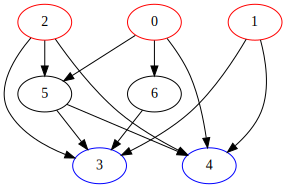

In [21]:
visualize_network(new)

# 